# Industria de videojuegos

El análisis se centrará en explorar relaciones entre las características de los videojuegos y su éxito en términos de ventas. Además, se realizarán pruebas de hipótesis para validar dos afirmaciones:

Hipótesis 1: Las clasificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
Hipótesis 2: Las clasificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

### Descripción de los datos
Hay un conjunto de datos que se usará para hacer el procesamiento de datos y el análisis exploratorio de datos. A continuación se muestran los nombres de las columnas e información de estas mismas.

Name -- nombre

Platform -- plataforma

Year_of_Realease -- año de lanzamiento

Genre -- género

NA_sales -- ventas en Norteamérica en millones de dólares

EU_sales -- ventas en Europa en millones de dólares

JP_sales -- ventas en Japon en millones de dólares

Other_sales -- ventas en otros países en millones de dólares

Critic_Score -- puntaje de los expertos en escala 100

User_Score -- puntaje de los usuarios en escala de 10

Rating -- Rating del Entretainment Software Rating Board (ESRB)

In [8]:
#importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [9]:
#importación de datos
df= pd.read_csv('/Users/elizabethmandujano/Desktop/industria_de_videojuegos/games.csv')

In [10]:
#leer conjunto de datos
display (df.sample(10))
print (df.info())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
5987,Area 51,XB,2005.0,Shooter,0.22,0.06,0.00,0.01,72.0,8.1,M
4495,MLB 14: The Show,PS3,2014.0,Sports,0.35,0.00,0.00,0.08,81.0,6.8,E
7579,NBA Live 14,XOne,2013.0,Sports,0.16,0.02,0.00,0.02,36.0,3.1,E
10062,Fatal Frame: Maiden of Black Water,WiiU,2014.0,Action,0.00,0.03,0.08,0.00,67.0,7.6,M
5503,Night at the Museum: Battle of the Smithsonian,Wii,2009.0,Action,0.17,0.13,0.00,0.03,54.0,tbd,E10+
8801,All Japan Pro Wrestling featuring Virtua,SAT,1997.0,Fighting,0.00,0.00,0.15,0.00,NaN,NaN,NaN
9653,Deadpool,XOne,2015.0,Action,0.09,0.03,0.00,0.01,NaN,5.7,M
14562,Starshot: Space Circus Fever,N64,1998.0,Platform,0.02,0.01,0.00,0.00,NaN,NaN,NaN
4921,Monster Jam: Urban Assault,DS,2008.0,Racing,0.36,0.00,0.00,0.03,NaN,tbd,E
2197,Phantasy Star Portable,PSP,2008.0,Role-Playing,0.19,0.06,0.63,0.05,64.0,7.8,T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


### Preparación de datos 

Se deberá verificar que el tipo de datos sea el correcto para cada columna. Si se identifica algún error, lo mas factible será consultar con la librería NumPy para saber si es seguro o no cambiar el tipo de datos. Después se deberá analizar si es conveniente eliminar valores duplicados o no, ya que eliminar/dejar valores duplicados podrá afectar a todo el análizis posterior. Finalmente, se deberán tratar los valores ausentes dependiendo que objetivos se quiere cumplir. Se analizará si es mejor eliminar las filas con valores ausentes o si es mejor reemplazar los valores ausentes con otros valores.

In [11]:
# reemplazar los nombres de las columnas a minúsculas    
columns_new= []

for old_name in df.columns:
    name_lowered = old_name.lower()
    columns_new.append(name_lowered)
    
df.columns =columns_new

print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


In [12]:
#tratar valores ausentes y verificar duplicados
## columnas genre y name
nan_genre= df['genre'].isnull()
print (df[nan_genre])
df=df.dropna(subset=['name','genre'])

#user_score 
#df sin nan para obtener los valores promedio y despues reemplazar los nan con estos valores.

df['user_score'].replace(to_replace='tbd', value= ' ', inplace= True)
df['user_score']=pd.to_numeric(df['user_score'], errors='coerce')


## otras columnas con valores ausentes
df['rating'].fillna('Unknown', inplace= True)

print (df.info())

      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN  
<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9

En las columnas name y genre se encontraron dos valores ausentes que corresponden a un videojuego del año 1993, se considera que no es de importancia estos datos ya que es antigÜo, se eliminarán esas filas. Respecto a la columna rating, se sustituyeron los valores nan con valor "Unknown". En la columna user_score se encontro un valor 'tbd', se sustituirá esos valores por nan. En la columna critic_score y user_score no se sustitiyeron los valores vacíos para no modificar los resultados de los cálculos posteriormente.

In [13]:
#ventas totales para cada juego
df['total_sales']= df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']
display (df.sample(5))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
12342,Kururin Paradise,GBA,2002.0,Puzzle,0.00,0.00,0.06,0.00,NaN,NaN,Unknown,0.06
14308,Earthworm Jim 2,GBA,2002.0,Platform,0.02,0.01,0.00,0.00,45.0,5.7,E,0.03
6035,SD Gundam Gaiden: Knight Gundam Monogatari: Oo...,SNES,1991.0,Role-Playing,0.00,0.00,0.29,0.00,NaN,NaN,Unknown,0.29
9427,Dengeki Bunko Fighting Climax,PSV,2014.0,Fighting,0.04,0.00,0.08,0.01,75.0,8.5,T,0.13
1480,UFC Undisputed 2010,X360,2010.0,Fighting,0.90,0.31,0.00,0.11,84.0,6.7,T,1.32


### Análisis de datos

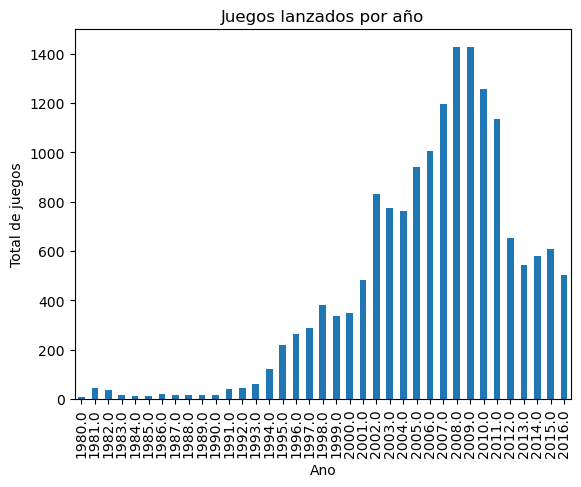

In [14]:
#total de juegos lanzados por año
games_per_year= df.groupby('year_of_release')['name'].count()
games_per_year.plot(kind='bar',
                   title='Juegos lanzados por año',
                   xlabel='Ano',
                   ylabel='Total de juegos')
plt.show()

Se llega a apreciar que los años con mas juegos lanzados fue entre 2007 y 2011. Hay una reciente caída de lanzamieento de juegos a partir del año 2013 en adelante.

In [15]:
#observar como varían las ventas de una plataforma a otra. 
ventas_plataforma= df.groupby('platform').sum().reset_index()
ventas_plataforma_filtro=ventas_plataforma.loc[:,['platform','na_sales','eu_sales','jp_sales','other_sales']]
print (ventas_plataforma_filtro)

   platform  na_sales  eu_sales  jp_sales  other_sales
0      2600     90.60      5.47      0.00         0.91
1       3DO      0.00      0.00      0.10         0.00
2       3DS     83.49     61.48    100.67        13.36
3        DC      5.43      1.69      8.56         0.27
4        DS    382.40    188.89    175.57        59.26
5        GB    114.32     47.82     85.12         8.20
6       GBA    187.54     75.25     47.33         7.73
7        GC    133.46     38.71     21.58         5.18
8       GEN     19.27      5.52      2.67         0.89
9        GG      0.00      0.00      0.04         0.00
10      N64    139.02     41.06     34.22         4.38
11      NES    125.94     21.15     98.65         5.31
12       NG      0.00      0.00      1.44         0.00
13       PC     94.53    142.44      0.17        22.38
14     PCFX      0.00      0.00      0.03         0.00
15       PS    336.52    213.61    139.82        40.91
16      PS2    583.84    339.29    139.20       193.44
17      PS

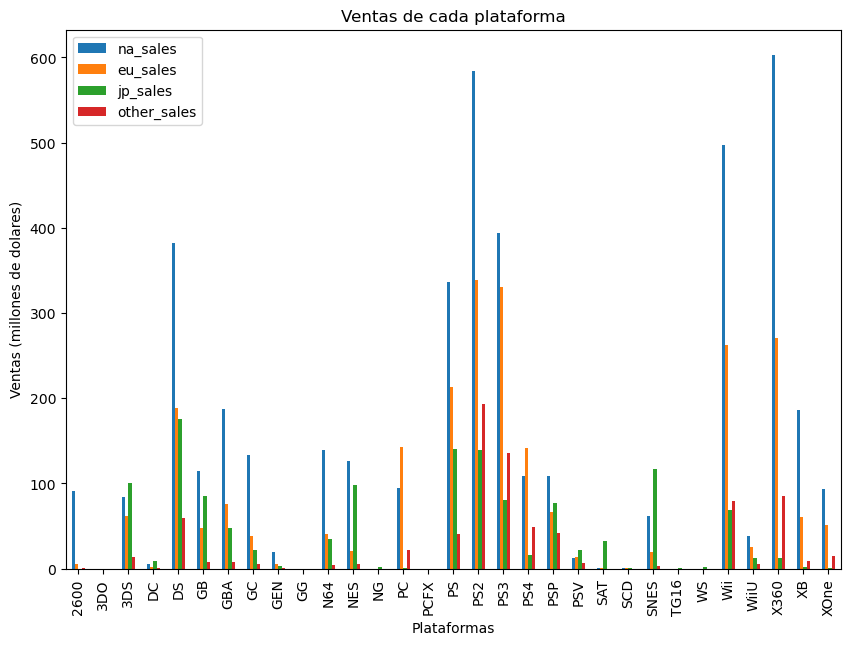

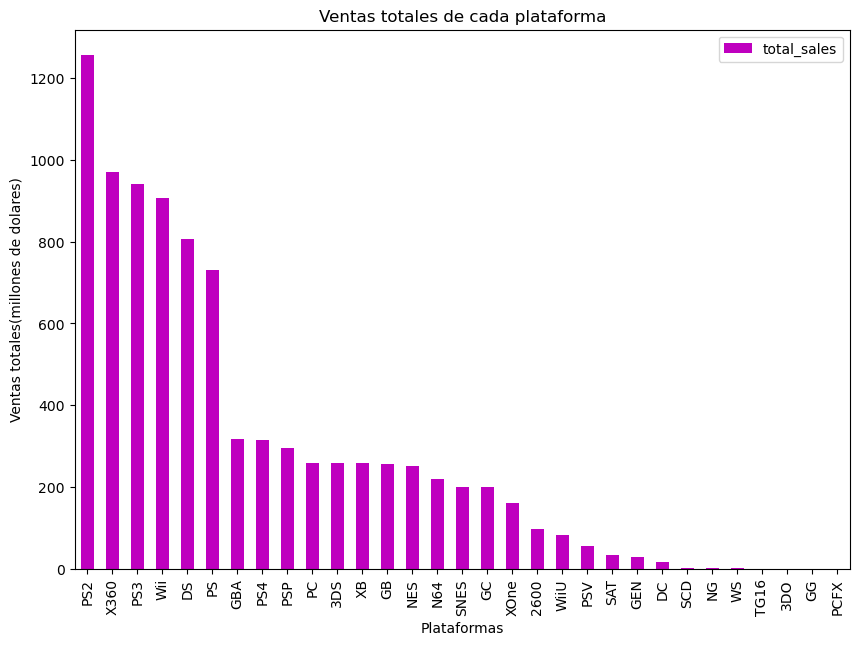

In [16]:
#graficar las ventas
ventas_plataforma_filtro.plot(kind='bar',
                             x='platform',
                             title='Ventas de cada plataforma',
                             xlabel='Plataformas',
                             ylabel='Ventas (millones de dolares)',
                             figsize=(10,7))
plt.show()

ventas_totales=ventas_plataforma.loc[:, ['platform','total_sales']]
#print (ventas_totales)
ventas_totales.sort_values(by='total_sales', ascending= False).plot(kind='bar',
                   x='platform',
                   title='Ventas totales de cada plataforma',
                   xlabel='Plataformas',
                   ylabel='Ventas totales(millones de dolares)',
                   figsize=(10,7),
                   color='m')
plt.show()

Con base en las gráficas anteriores, se concluye que las plataformas con mas ventas totales son 'PS2' y 'X360' con un total de 1255.77mdd y 971.42mdd respectivamente. Posteriormente se construirá una distribución basada en los datos de cada año de estas plataformas mencionadas

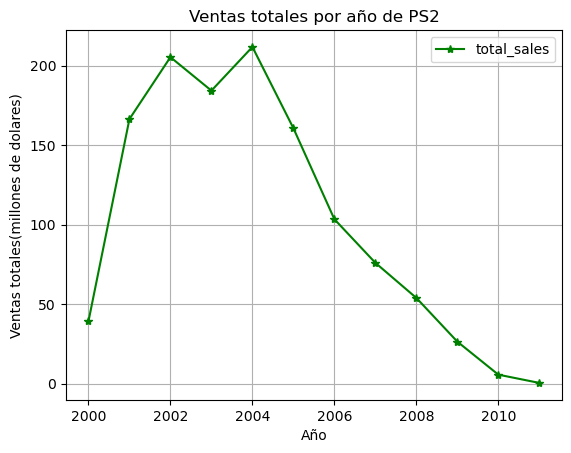

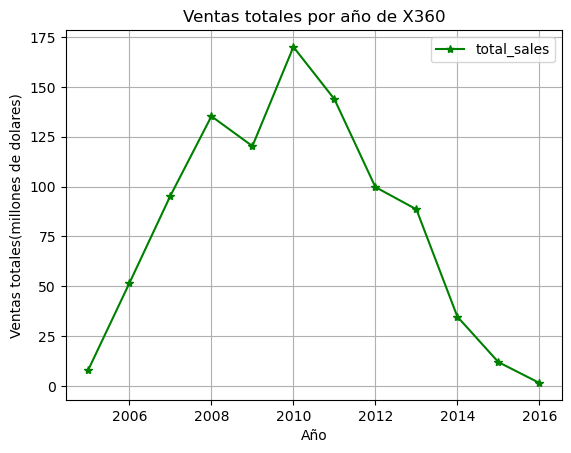

In [17]:
#distribución de ventas por año plataforma ps2 y x360
ps2= df[df['platform']=='PS2']
ventas_ps2=ps2.groupby('year_of_release')['total_sales'].sum().reset_index()
ventas_ps2.plot(x='year_of_release',
                title='Ventas totales por año de PS2',
                xlabel='Año',
                ylabel='Ventas totales(millones de dolares)',
                color='g',
                marker='*')
plt.grid()
plt.show()

x360= df[df['platform']=='X360']
ventas_x360=x360.groupby('year_of_release')['total_sales'].sum().reset_index()
ventas_x360.plot(x='year_of_release',
                title='Ventas totales por año de X360',
                xlabel='Año',
                ylabel='Ventas totales(millones de dolares)',
                color='g',
                marker='*')
plt.grid()
plt.show()

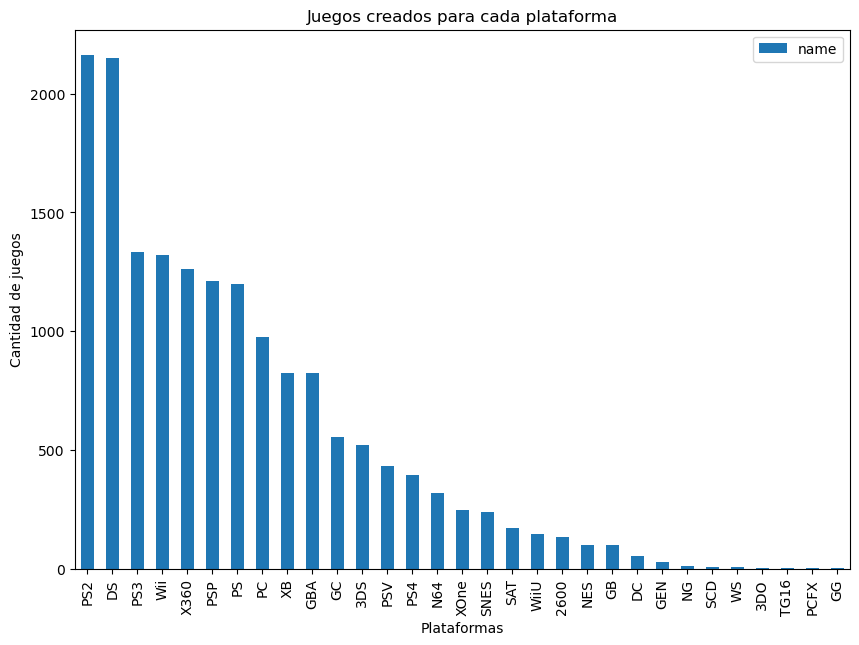

In [18]:
#total de juegos estrenados para cada plataforma 
juegos_plataforma= df.groupby('platform')['name'].count().reset_index()
juegos_plataforma.sort_values(by='name', ascending=False).plot(kind='bar',
                          x='platform',
                          title='Juegos creados para cada plataforma',
                          xlabel='Plataformas',
                          ylabel='Cantidad de juegos',
                          figsize=(10,7))
plt.show()

La plataforma DS y PS2 tienen la mayor cantidad de juegos, se sabe previamente que la plataforma PS2 era muy popular, ahora se analaizará la plataforma DS para concluir si sigue siendo una plataforma que genera importancia o no.

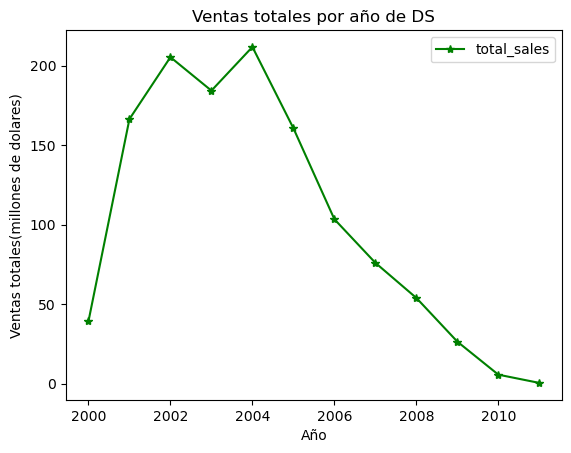

In [19]:
#analizar las ventas de DS
ds= df[df['platform']=='DS']
ventas_ds=ps2.groupby('year_of_release')['total_sales'].sum().reset_index()
ventas_ds.plot(x='year_of_release',
                title='Ventas totales por año de DS',
                xlabel='Año',
                ylabel='Ventas totales(millones de dolares)',
                color='g',
                marker='*')
plt.show()

Se puede relacionar que el pico de ventas es el equivalente a la popularidad de la plataforma, aproximadamente el tiempo en el que las plataformas son muy populares es de 2-4 años y después su popularidad y sus ventas van bajando de manera drástica.

Después de analizar los datos previos, se concluye que se tomarán en cuenta los datos de los años 2014,2015 y 2016 para poder obtener predicciones de las ventas/popularidad del año 2017 y así tener un modelo para el 2017.

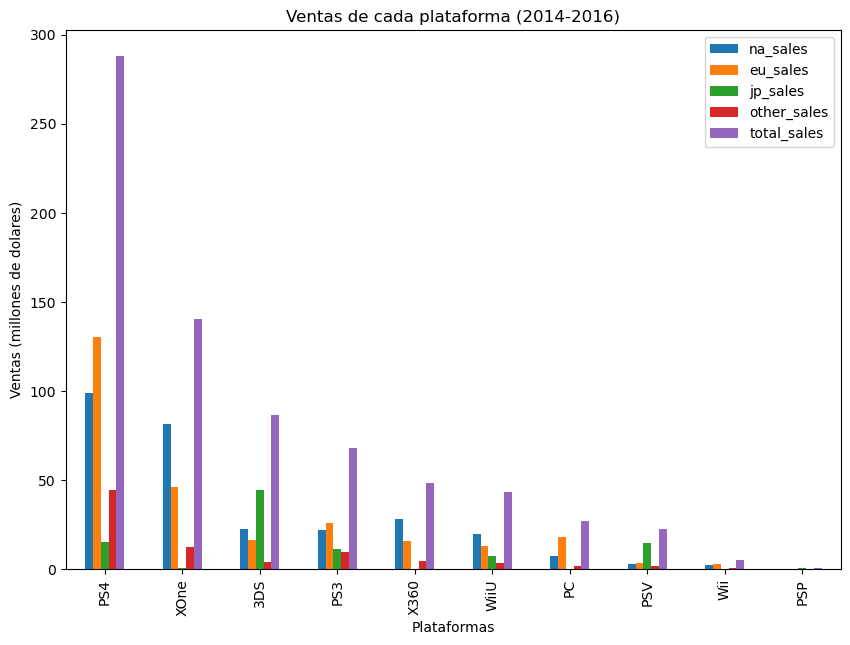

In [20]:
new_df= df[df['year_of_release'] >= 2014]
#plataformas líderes en ventas
df_grupo= new_df.groupby('platform').sum().reset_index()
ventas_filtro=df_grupo.loc[:,['platform','na_sales','eu_sales','jp_sales','other_sales', 'total_sales']]
ventas_filtro.sort_values(by='total_sales', ascending=False).plot(kind='bar',
                   x='platform',
                   title='Ventas de cada plataforma (2014-2016)',
                   xlabel='Plataformas',
                   ylabel='Ventas (millones de dolares)',
                   figsize=(10,7))
plt.show()

La plataforma líder es la PS4, después el XOne (aunque en Japón no tiene ventas) y el 3DS el cual tiene ventas significativas en Japón y en las otras partes del mundo.

,year_of_release,platform_x,total_sales_ps4,platform_y,total_sales_xone,platform,total_sales_3ds
0,2014.0,PS4,100.00,XOne,54.07,3DS,43.76
1,2015.0,PS4,118.90,XOne,60.14,3DS,27.78
2,2016.0,PS4,69.25,XOne,26.15,3DS,15.14


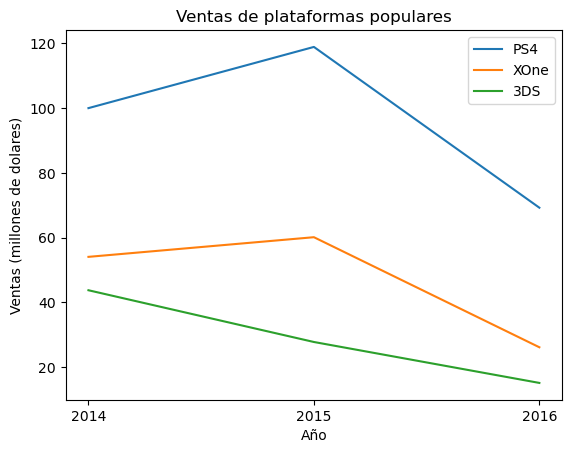

In [21]:
#analizar las ventas de las plataformas potencialmente rentables
ventas_suma= new_df.groupby(['year_of_release','platform'])['total_sales'].sum().reset_index()

ventas_ps4= ventas_suma[(ventas_suma['platform']== 'PS4')][['year_of_release','platform','total_sales']].reset_index()
ventas_ps4.rename(columns={'total_sales':'total_sales_ps4'}, inplace=True)

ventas_xone= ventas_suma[(ventas_suma['platform']== 'XOne')][['year_of_release','platform','total_sales']].reset_index()
ventas_xone.rename(columns={'total_sales':'total_sales_xone'}, inplace=True)

ventas_3ds= ventas_suma[(ventas_suma['platform']== '3DS')][['year_of_release','platform','total_sales']].reset_index()
ventas_3ds.rename(columns={'total_sales':'total_sales_3ds'}, inplace=True)

#merge los df
ventas = ventas_ps4.merge(ventas_xone,on='year_of_release').merge(ventas_3ds,on='year_of_release')
ventas.drop(['index_x','index_y','index'], axis=1, inplace=True)
display (ventas)

#trazar gráfico
ventas.plot(x='year_of_release',
            xlabel='Año',
            ylabel= 'Ventas (millones de dolares)',
            title= 'Ventas de plataformas populares',
            xticks=[2014,2015,2016]
           )
plt.legend(['PS4','XOne','3DS'])
plt.show()

Se puede apreciar que el pico de ventas de las plataformas PS4 y XOne fue en el 2015 y progresivamente va disminuyendo sus ventas, por otro lado, la plataforma 3DS en el 2014 tuvo mayores ventas que en los años posteriores. Concluyendo así, que las ventas de las tres plataformas van en caída. Existe la probabilidad que en los siguientes años se deberán crear nuevas plataformas para que los usuarios vuelvan a tener interés en comprar plataformas y juegos

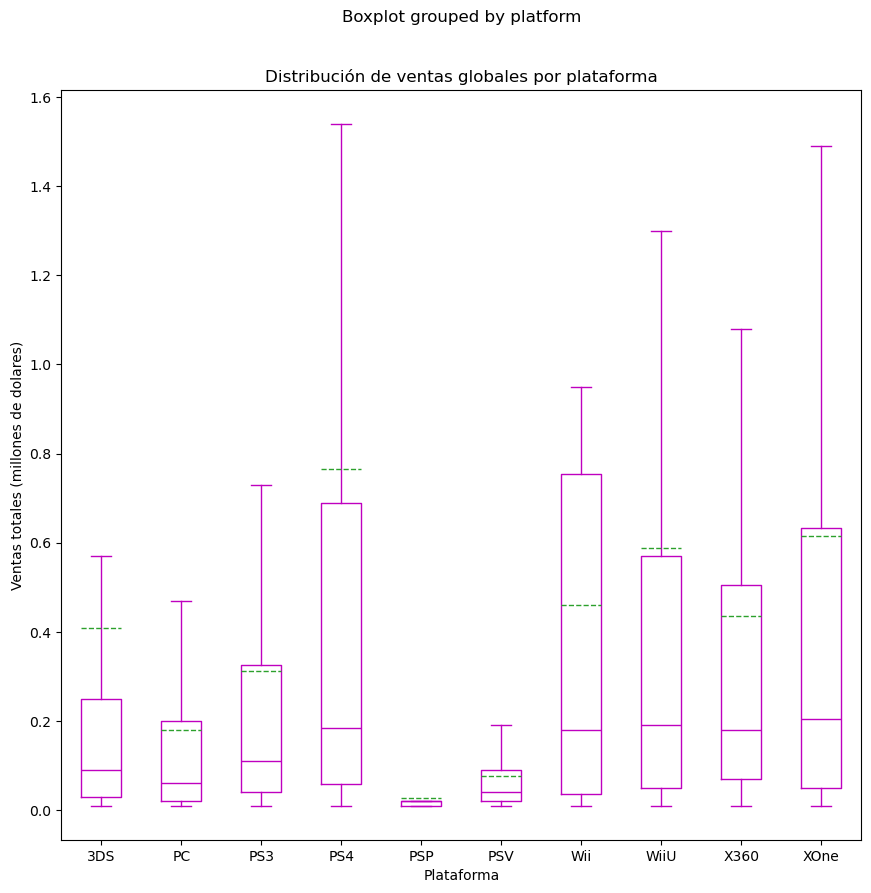

In [22]:
# Traza un diagrama de caja para las ventas globales de todos los juegos
new_df.boxplot(by='platform',
               column='total_sales',
               grid=False,
               figsize=(10,10),
               color='m',
               showfliers=False,
               meanline=True,
               showmeans=True)
plt.title('Distribución de ventas globales por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas totales (millones de dolares)')
plt.show()

Las ventas promedio de unas plataformas a otras son muy variadas, se aprecia una gran diferencia entre la media y la mediana de todas las cajas de bigotes, esto se debe a que hay muchos valores atípicos dentro del dataset que seguramente se deba a que hay juegos con muchas mas ventas que otros juegos.Por tema de formato, no se mostrarán los valores atípicos en la caja de bigotes.

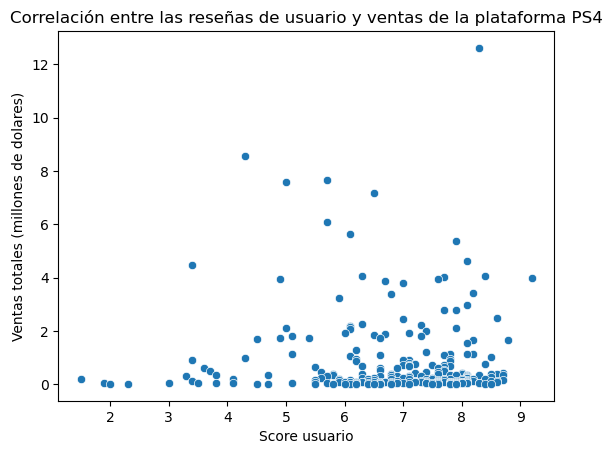

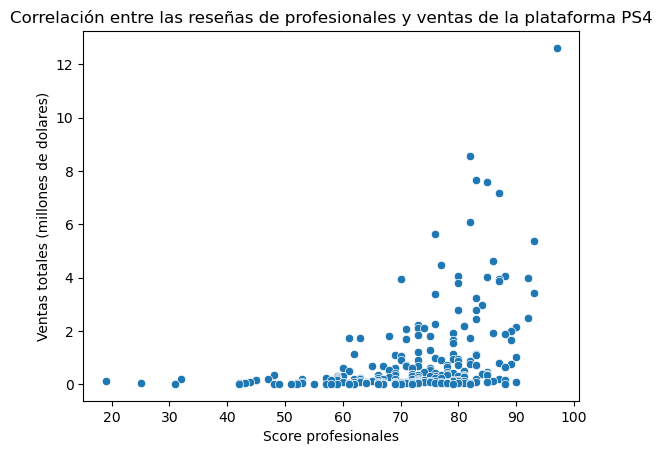

In [23]:
#analizar reseñas de usuarios y profesionales con respecto a las ventas de una plataforma
df_ps4= new_df[new_df['platform'] == 'PS4']

#reseña de usuarios 
sns.scatterplot(data=df_ps4, 
                x='user_score', 
                y='total_sales'
                )
plt.xlabel('Score usuario')
plt.ylabel('Ventas totales (millones de dolares)')
plt.title('Correlación entre las reseñas de usuario y ventas de la plataforma PS4')
plt.show()

#reseña de profesionales 
sns.scatterplot(data=df_ps4, 
                x='critic_score', 
                y='total_sales'
                )
plt.xlabel('Score profesionales')
plt.ylabel('Ventas totales (millones de dolares)')
plt.title('Correlación entre las reseñas de profesionales y ventas de la plataforma PS4')
plt.show()

Analizando la correlación de las reseñas de usuario con las ventas, se concluye que los juegos con reseñas entre 7-8 son los de mayor venta. Con respecto a las reseñas de profesionales con las ventas, las reseñas entre 90-100 son las de mayor venta. Concluyendo que muy probablemente los usuarios ven primero las reseñas de los profesionales para posteriormente comprar los juegos y ellos probarlo y sacar sus reseñas por ellos mismos. Pero en definitiva, la reseña del profesional si influye en la compra del usuario.

,name,total_sales_ps4,total_sales_all
0,Call of Duty: Black Ops 3,14.63,11.04
1,Grand Theft Auto V,12.62,6.64
2,FIFA 16,8.58,7.72
3,Star Wars Battlefront (2015),7.98,4.21
4,Call of Duty: Advanced Warfare,7.66,14.31
5,FIFA 17,7.60,3.88
6,Fallout 4,7.17,5.50
7,FIFA 15,6.08,11.29
8,Destiny,5.64,6.90
9,Uncharted 4: A Thief's End,5.39,NaN


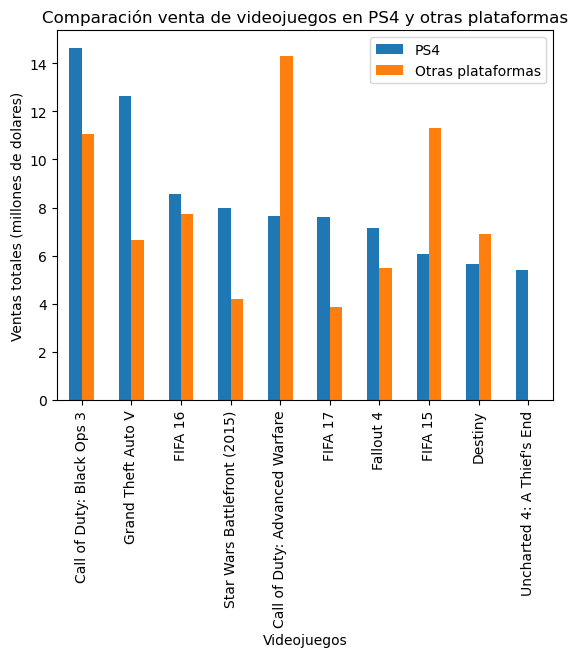

In [24]:
#comparación venta de juegos 
#en ps4 
games_ps4= df_ps4.groupby('name')['total_sales'].sum().reset_index().sort_values('total_sales', ascending=False)
popular_games_ps4= games_ps4.head(10).reset_index(drop=True)

#otras plataformas
df_not_ps4= new_df[new_df['platform'] != 'PS4'].reset_index(drop=True)
games_other=df_not_ps4.groupby('name')['total_sales'].sum().reset_index().sort_values('total_sales', ascending=False)

#merge los df
all_games= popular_games_ps4.merge(games_other, on= 'name', how='left')
all_games.rename(columns={'total_sales_x':'total_sales_ps4', 'total_sales_y':'total_sales_all'}, inplace=True)

#trazar gráfico
display (all_games)
all_games.plot(x='name',
               xlabel='Videojuegos',
               kind='bar',
               ylabel='Ventas totales (millones de dolares)',
               title='Comparación venta de videojuegos en PS4 y otras plataformas')

plt.legend(['PS4', 'Otras plataformas'])
plt.show()

Es notorio que los juegos de Call of Duty son muy populares y rentables, tanto para PS4 como para las otras plataformas. Grand Theft Auto V y FIFA igual tienen ventas muy significativas. Se observa que el videojuego Uncharted 4: A Thief's End solo salió para la plataforma PS4, es por eso que no tiene ventas es las demás plataformas, pero aún así esta en el top 10 de los juegos mas vendidos en PS4.

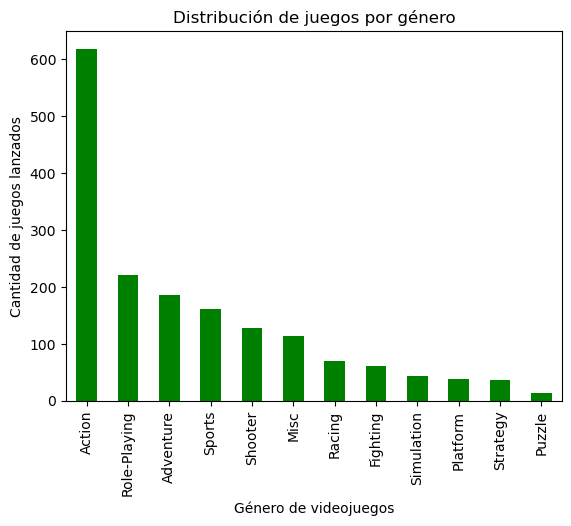

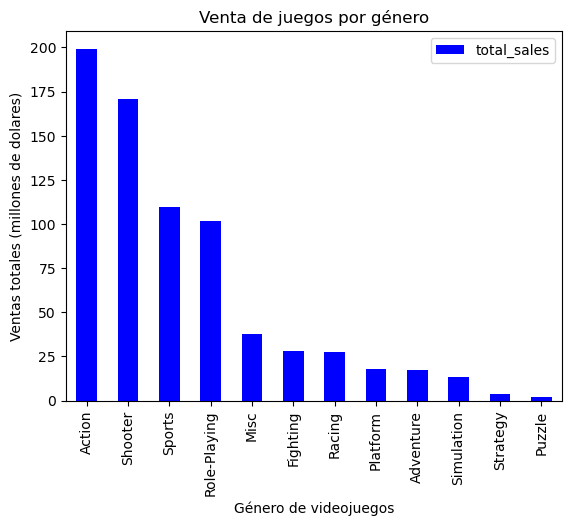

In [25]:
#distribución de juegos por género
games= new_df.value_counts(subset= 'genre')
games.plot(kind='bar',
                 title='Distribución de juegos por género',
                 xlabel= 'Género de videojuegos',
                 ylabel= 'Cantidad de juegos lanzados',
                 color= 'g'
                )
plt.show()

#analisis de géneros más rentables
genre_games= new_df.groupby('genre')['total_sales'].sum().reset_index()
games_sales= genre_games.sort_values(by='total_sales',ascending=False).reset_index(drop=True)
games_sales.plot(kind='bar',
                 x='genre',
                 title='Venta de juegos por género',
                 xlabel= 'Género de videojuegos',
                 ylabel= 'Ventas totales (millones de dolares)',
                 color= 'b'
                )
plt.show()


Los géneros con más ganancias son acción, tiro y deportes, los géneros con más cantidad de juegos son acción, juegos de rol y aventura. Se concluye que el género de accción es el que más juegos tiene y también el que genera más ganancias. En definitiva se debe invertir publicidad y crear juegos del género de acción.

### Perfil de usuario para cada región

Para cada región (NA, EU, JP) se determinará:

1. Las cinco plataformas principales con descripción de las variaciones en sus cuotas de mercado de una región a otra.
2. Los cinco géneros principales.
3. Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

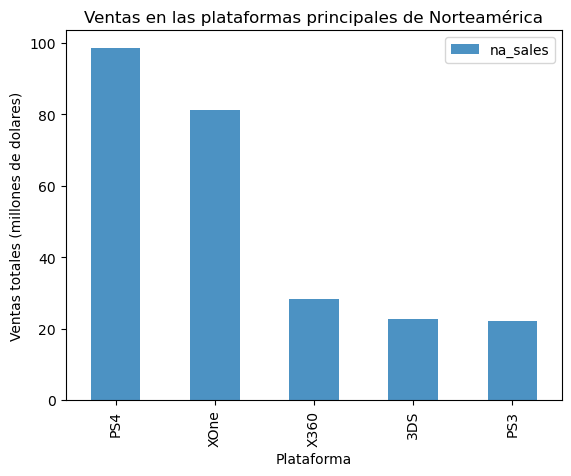

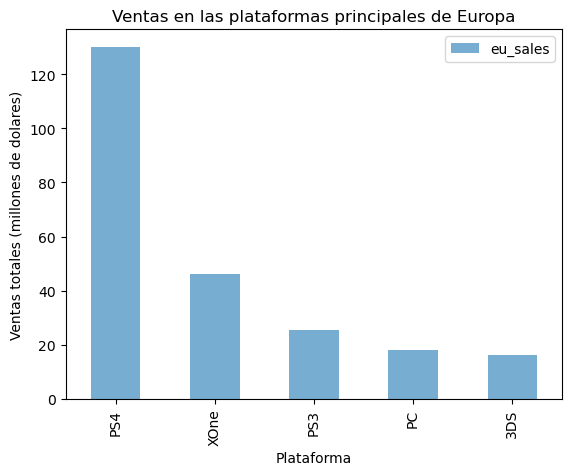

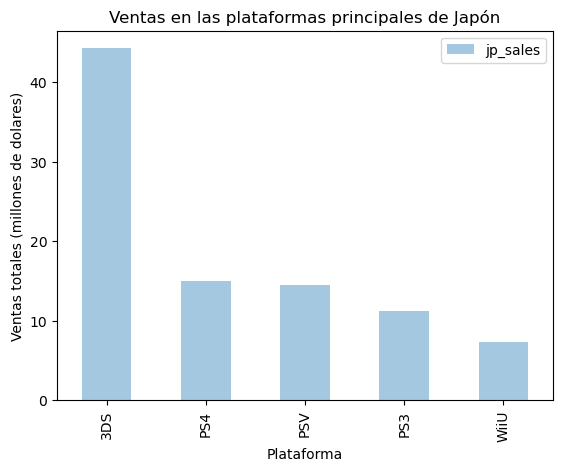

In [26]:
# 1. plataformas principales
ventas_plataforma= new_df.groupby('platform').sum().reset_index()
ventas_na= ventas_plataforma.loc[:,['platform','na_sales']]
ventas_eu= ventas_plataforma.loc[:,['platform','eu_sales']]
ventas_jp= ventas_plataforma.loc[:,['platform','jp_sales']]

#na
plataforma_na= ventas_na.sort_values('na_sales', ascending= False)
popular_na= plataforma_na.head(5).reset_index(drop=True)
##print (popular_na)

#eu
plataforma_eu= ventas_eu.sort_values('eu_sales', ascending= False)
popular_eu= plataforma_eu.head(5).reset_index(drop=True)
##print (popular_eu)

#jp
plataforma_jp= ventas_jp.sort_values('jp_sales', ascending= False)
popular_jp= plataforma_jp.head(5).reset_index(drop=True)
##print (popular_jp)

#gráficas
popular_na.sort_values(by='na_sales',ascending=False).plot(kind='bar',
                x= 'platform',
                title= 'Ventas en las plataformas principales de Norteamérica',
                xlabel= 'Plataforma',
                ylabel= 'Ventas totales (millones de dolares)',
                alpha= 0.8)

popular_eu.sort_values(by='eu_sales',ascending=False).plot(kind='bar',
                x= 'platform',
                title= 'Ventas en las plataformas principales de Europa',
                xlabel= 'Plataforma',
                ylabel= 'Ventas totales (millones de dolares)',
                alpha= 0.6)

popular_jp.sort_values(by='jp_sales',ascending=False).plot(kind='bar',
                x= 'platform',
                title= 'Ventas en las plataformas principales de Japón',
                xlabel= 'Plataforma',
                ylabel= 'Ventas totales (millones de dolares)',
                alpha= 0.4)

plt.show()


Las ventas en Europa son mayores que en las demás regiones, en Europa se alcanzan ventas de casi 120 mdd mientras que en Norteamérica 100 mdd y en Japón apenas 40 mdd. Se debe tener en cuenta que el espacio geográfico entre una región y otra son completamente distintas siendo unos territorios (tomando en cuenta la población) mas grandes que otros.

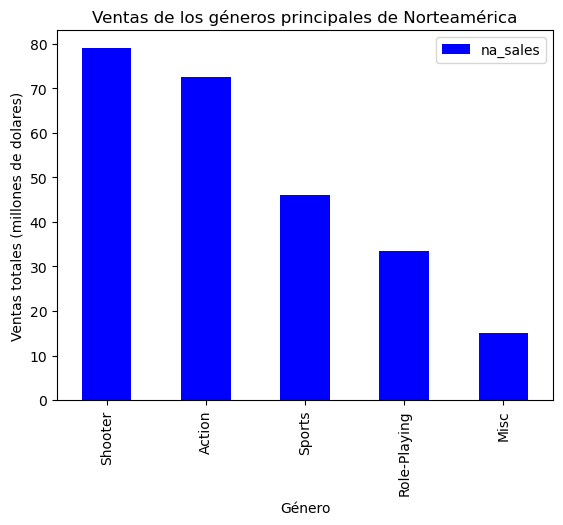

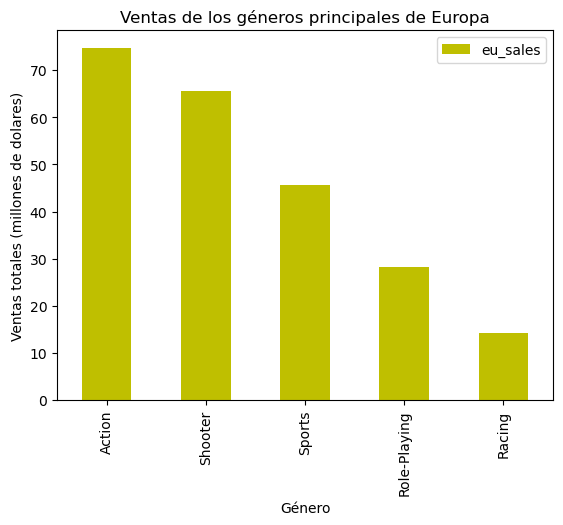

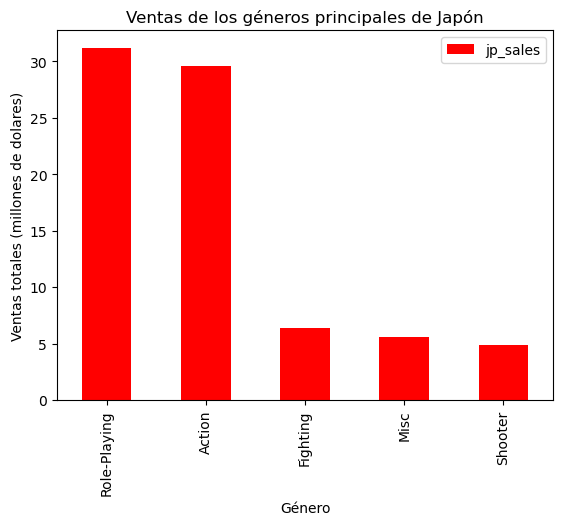

In [27]:
#2. géneros principales 
ventas_genero= new_df.groupby('genre').sum().reset_index()
genero_na_sales= ventas_genero.loc[:,['genre','na_sales']]
genero_eu_sales= ventas_genero.loc[:,['genre','eu_sales']]
genero_jp_sales= ventas_genero.loc[:,['genre','jp_sales']]

#na
genero_na= genero_na_sales.sort_values('na_sales', ascending= False)
popular_na_sales= genero_na.head(5).reset_index(drop=True)
##print (popular_na_sales)

#eu
genero_eu= genero_eu_sales.sort_values('eu_sales', ascending= False)
popular_eu_sales= genero_eu.head(5).reset_index(drop=True)
##print (popular_eu_sales)

#jp
genero_jp= genero_jp_sales.sort_values('jp_sales', ascending= False)
popular_jp_sales= genero_jp.head(5).reset_index(drop=True)
##print (popular_jp_sales)

#graficas
popular_na_sales.sort_values(by='na_sales',ascending=False).plot(kind='bar',
                x= 'genre',
                title= 'Ventas de los géneros principales de Norteamérica',
                xlabel= 'Género',
                ylabel= 'Ventas totales (millones de dolares)',
                color= 'b')

popular_eu_sales.sort_values(by='eu_sales',ascending=False).plot(kind='bar',
                x= 'genre',
                title= 'Ventas de los géneros principales de Europa',
                xlabel= 'Género',
                ylabel= 'Ventas totales (millones de dolares)',
                color='y')

popular_jp_sales.sort_values(by='jp_sales',ascending=False).plot(kind='bar',
                x= 'genre',
                title= 'Ventas de los géneros principales de Japón',
                xlabel= 'Género',
                ylabel= 'Ventas totales (millones de dolares)',
                color='r')

plt.show()

Japón presenta un gusto por géneros distintos al resto de regiones, ya que Japón tiene un gusto particular por los juegos de rol mientras que las otras regiones su género favorito es acción y los juegos de rol ni siquiera aparecen en el top 3. Algo en común que tienen todas las regiones es el gusto por el género de acción.

  rating  total_sales
0      E       133.13
1   E10+        71.68
2      M       226.54
3      T        99.13


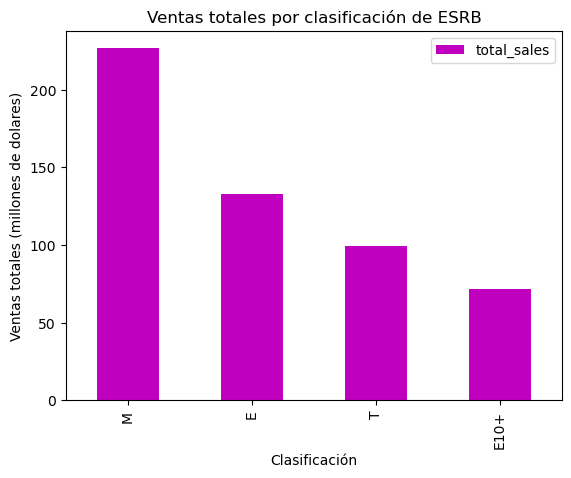

In [28]:
# relación entre las clasificaciones de ESRB y ventas
clasificacion_sin_unknown= new_df[new_df['rating'] != 'Unknown']
clasificacion= clasificacion_sin_unknown.groupby('rating')['total_sales'].sum().reset_index()
print (clasificacion)

clasificacion.sort_values(by='total_sales',ascending=False).plot(kind='bar',
                x= 'rating',
                title= 'Ventas totales por clasificación de ESRB',
                xlabel= 'Clasificación',
                ylabel= 'Ventas totales (millones de dolares)',
                color= 'm')
plt.show()

La clasificación M correspondiente a "mature" es la de mayor ventas, excluyendo las ventas totales con clasificación desconocida, en un futuro será importante clasificar esos juegos para poder tener un análisis mas exacto.

### Prueba de hipótesis

En esta sección se probaran las siguientes hipótesis:

* H0,1 = Las clasificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
* HA,1 = Las clasificaciones promedio de los usuarios para las plataformas Xbox One y PC son distintas.
* H0,2 = Las clasificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.
* HA,2 = Las clasificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.
Para estas pruebas de hipótesis se usará la prueba sobre la iguadad de las medias de dos poblaciones usando el método stats.ttest_ind() tomando una significancia del 5%.

In [29]:
#prueba de hipótesis 1
xbox= new_df[new_df['platform']=='XOne']['user_score']
pc= new_df[new_df['platform']=='PC']['user_score']

var_xbox= np.var(xbox)
var_pc= np.var(pc)

print (f'Varianza de Xbox One:  {var_xbox}')
print (f'Varianza de PC:  {var_pc}')

#Realizar la prueba de t 
statistic, p_value= st.ttest_ind(xbox,pc, equal_var=False)
print (f'Estadístico de prueba (t): {statistic}')
print (f'Valor p: {p_value}')

#Significancia
alpha=0.05
#P value evaluación
if p_value < alpha:
    print ('Rechazamos la hipótesis nula. Hay evidencia para suponer que hay diferenica significativa en las calificaciones de los promedios de los usuarios.')
else:
    print ('No podemos rechazar la hipótesis nula. No hay suficiente evidencia para supone que hay una diferencia significativa en las calificaciones de los promedios de los usuarios')


Varianza de Xbox One:  1.87954600550964
Varianza de PC:  2.877374361730719
Estadístico de prueba (t): nan
Valor p: nan
No podemos rechazar la hipótesis nula. No hay suficiente evidencia para supone que hay una diferencia significativa en las calificaciones de los promedios de los usuarios


In [30]:
#prueba de hipótesis 2
accion= new_df[new_df['genre']=='Action']['user_score']
deportes= new_df[new_df['genre']=='Sports']['user_score']

var_accion= np.var(accion)
var_deportes= np.var(deportes)

print (f'Varianza de Xbox One:  {var_accion}')
print (f'Varianza de PC:  {var_deportes}')

#Realizar la prueba de t 
statistic, p_value= st.ttest_ind(accion,deportes, equal_var=False)
print (f'Estadístico de prueba (t): {statistic}')
print (f'Valor p: {p_value}')

#Significancia
alpha=0.05
#P value evaluación
if p_value < alpha:
    print ('Rechazamos la hipótesis nula. Hay evidencia para suponer que hay diferenica significativa en las calificaciones de los promedios de los usuarios.')
else:
    print ('No podemos rechazar la hipótesis nula. No hay suficiente evidencia para supone que hay una diferencia significativa en las calificaciones de los promedios de los usuarios')


Varianza de Xbox One:  1.8920844811753907
Varianza de PC:  3.419837559675118
Estadístico de prueba (t): nan
Valor p: nan
No podemos rechazar la hipótesis nula. No hay suficiente evidencia para supone que hay una diferencia significativa en las calificaciones de los promedios de los usuarios


### Conclusiones

Después del análisis exhaustivo de los datos disponibles, se ha identificado un patrón distintivo que determina el éxito de los videojuegos y las plataformas en la tienda online Ice. Este patrón se resume de la siguiente manera:

1. Los videojuegos con clasificación ESRB "everyone" tienden a tener un mayor éxito en términos de ventas.
2. En Norteamérica y el resto del mundo (excepto Japón), los juegos de acción son los más vendidos, mientras que en Japón, los juegos de rol tienen mayor demanda.
3. Los juegos de la franquicia Call of Duty, disponibles en plataformas como PS4 y Xbox One, son consistentemente los más vendidos.
4. Las reseñas de los expertos tienen un impacto significativo en las ventas de los videojuegos.

Basándose en estos hallazgos, se recomienda dirigir las campañas publicitarias principalmente hacia Europa, la región con mayores ventas y ganancias. Sin embargo, se observa una tendencia decreciente en las ventas de las plataformas más populares, como PS4 y Xbox One, lo que sugiere la necesidad de estar atentos a la posible aparición de nuevas plataformas innovadoras en los próximos años.

Finalmente, las hipótesis planteadas sobre las clasificaciones promedio de los usuarios para las plataformas Xbox One y PC, así como para los géneros de acción y deportes, han sido aceptadas, lo que proporciona una comprensión más clara de las preferencias de los usuarios en cuanto a géneros y plataformas.